<a href="https://colab.research.google.com/github/EL919177/EL919177/blob/main/Copy_of_Food_Sales_Predictions_wk5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
file_path = '/content/drive/MyDrive/01 Week 1: Python/sales_predictions (2).csv'
df = pd.read_csv(file_path)

In [25]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [26]:
len(df), len(df.columns)

(8523, 12)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [28]:
df.duplicated().sum()

0

In [29]:
df.isnull().sum().sort_values(ascending=False)/len(df)

Outlet_Size                  0.282764
Item_Weight                  0.171653
Item_Identifier              0.000000
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
dtype: float64

In [30]:
df['Item_Weight'].min(),df['Item_Weight'].max(),df['Item_Weight'].mean()

(4.555, 21.35, 12.857645184136183)

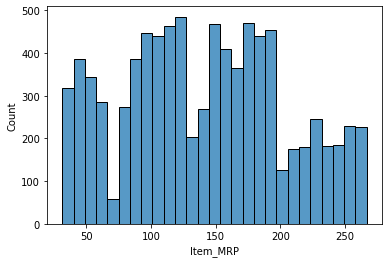

In [31]:
from seaborn.distributions import histplot
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=df, x='Item_MRP');

This indicates that the greater amount of middle range MRP, possibly reflecting a greater number of sales of middle ITEM MRP with a few upticks in high or low end MRP products.

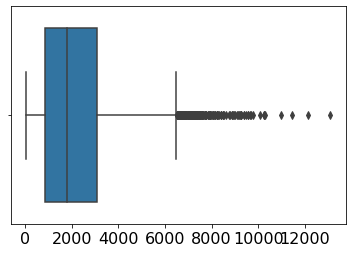

In [32]:
sns.boxplot(data=df, x='Item_Outlet_Sales');

plt.xlabel('', fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

This indicates a higher average of sales tend to be in the 2000s range but has a large set of outliers in the higher ranges.

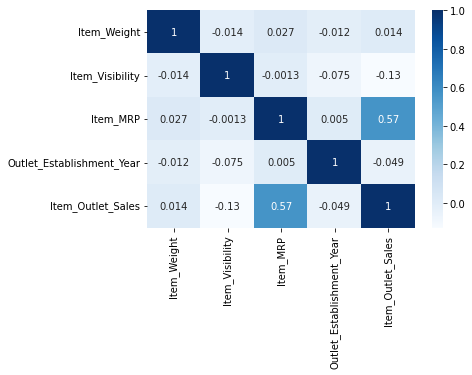

In [33]:
corr=df.corr()
sns.heatmap(corr,cmap='Blues', annot=True);

This shows a moderate correlation between MRP and SALES, which indicate that the sales are favorable with mid-range MRP products. 

Now, does Item MRP or Item Visibility affect sales?

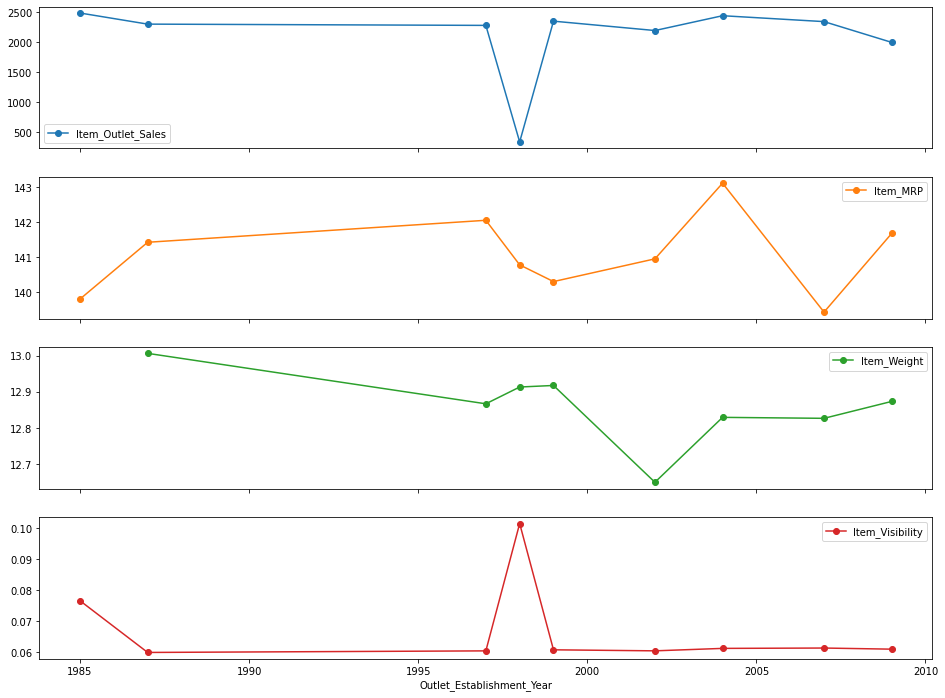

In [34]:
line_df = df.groupby('Outlet_Establishment_Year').mean()
line_df
line_df.plot(y=['Item_Outlet_Sales','Item_MRP','Item_Weight','Item_Visibility'], subplots=True, marker='o',figsize=(16,12));

Interestingly enough, Visibility and Sales present a very inverse relationship upon one another in hiwch the more Visiblity, the less sales have beem made throughout the year, while MRP has less of an impact 

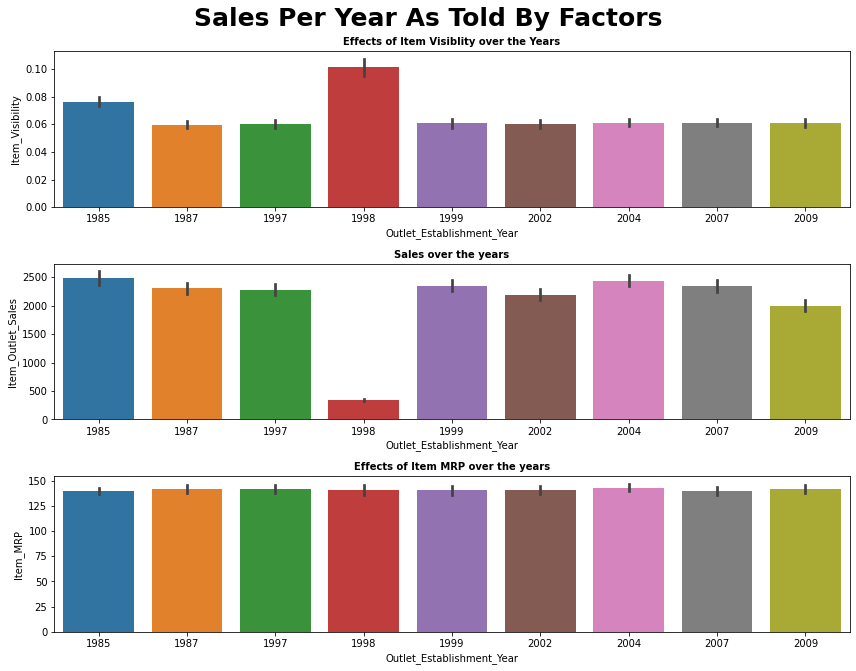

In [35]:
fig, axes = plt.subplots(nrows=3, figsize=(12,9))

# sns.barplot(data=df, x='Status', y='Life expectancy', ax=axes[0])
sns.barplot(data=df, x='Outlet_Establishment_Year', y='Item_Visibility', ax=axes[0])
axes[0].set_title('Effects of Item Visiblity over the Years', fontsize=10, fontweight='bold')

sns.barplot(data=df, x='Outlet_Establishment_Year', y='Item_Outlet_Sales', ax=axes[1])
axes[1].set_title('Sales over the years', fontsize=10, fontweight='bold')

sns.barplot(data=df, x='Outlet_Establishment_Year', y='Item_MRP', ax=axes[2])
axes[2].set_title('Effects of Item MRP over the years', fontsize=10, fontweight='bold')

fig.suptitle('Sales Per Year As Told By Factors',fontsize=25,fontweight='bold', y=1.03)

fig.tight_layout()

It seems that greater Visibility may negatively impact sales whereas MRP is stable throughout the years and is not indicative on whether the year was successful, but it may the that the Visibility was increased as a response to low sales in 1998.

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn import set_config
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
set_config(display='diagram')

In [37]:
y=df['Item_Outlet_Sales']
X=df.drop(columns='Item_Outlet_Sales')

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [39]:
num_selector=make_column_selector(dtype_include='number')
cat_selector=make_column_selector(dtype_include='object')
ohe=OneHotEncoder(sparse=False,handle_unknown='ignore')
scaler=StandardScaler()

In [40]:
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')

In [41]:
num_processor=make_pipeline(mean_imputer,scaler)
cat_processor=make_pipeline(freq_imputer,ohe)

In [42]:
num_tuple = (num_processor, num_selector)
cat_tuple = (cat_processor, cat_selector)

In [43]:
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')
col_transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f26cf35dd10>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f26cf35d610>)])